In [27]:
from keras.datasets import cifar10
import numpy as np
from  skimage import transform
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.optimizers import SGD
from sklearn.metrics import precision_score
import tensorflow as tf
import keras.backend as K
import random

In [13]:
(x_train, y_train),(x_test,y_test)=cifar10.load_data()

170498071/170498071 [==============================] - 14s 0us/step


In [14]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [15]:
#rescale datas values
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')
x_train=x_train/255.0
x_test=x_test/255.0
#encoding
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

print(y_train.shape)


(50000, 10)


In [16]:
#resize the image using tensorflow package
#there are also other ways to do this operation
x_train_16 = tf.image.resize(x_train,(16,16))

x_test_16= tf.image.resize(x_test,(16,16))

x_train_8 = tf.image.resize(x_train,(8,8))

x_test_8= tf.image.resize(x_test,(8,8))


In [ ]:
#other way to change the resolution

# new_shape = (16,16,3) #import the desierd resolution
# x_train_16 = np.asarray([transform.resize(image, new_shape) for image in x_train])
# x_test_16= np.asarray([transform.resize(image, new_shape) for image in x_test])



In [32]:
def pic_show(number):#maximum of number is 10
  pyplot.figure(figsize=(number*2,number*2))
  t=[random.randint(0,len(x_train)) for _ in range (number)]
  for i in range(number):
    pic_num=t[i] #defin which picture of data set we are going to display
    # define subplot
    pyplot.subplot(number,3,3*i+1)
      # plot raw pixel data
    pyplot.imshow(x_train[pic_num])
      #plot 8*8 resolution pic
    if i==0:
      pyplot.title('resolution is 32*32')
    pyplot.subplot(number,3,3*i+2)
    pyplot.imshow(x_train_16[pic_num])
    if i==0:
      pyplot.title('resolution is 16*16')  
    pyplot.subplot(number,3,3*i+3)
    pyplot.imshow(x_train_8[pic_num])
    if i==0:
      pyplot.title('resolution is 8*8')


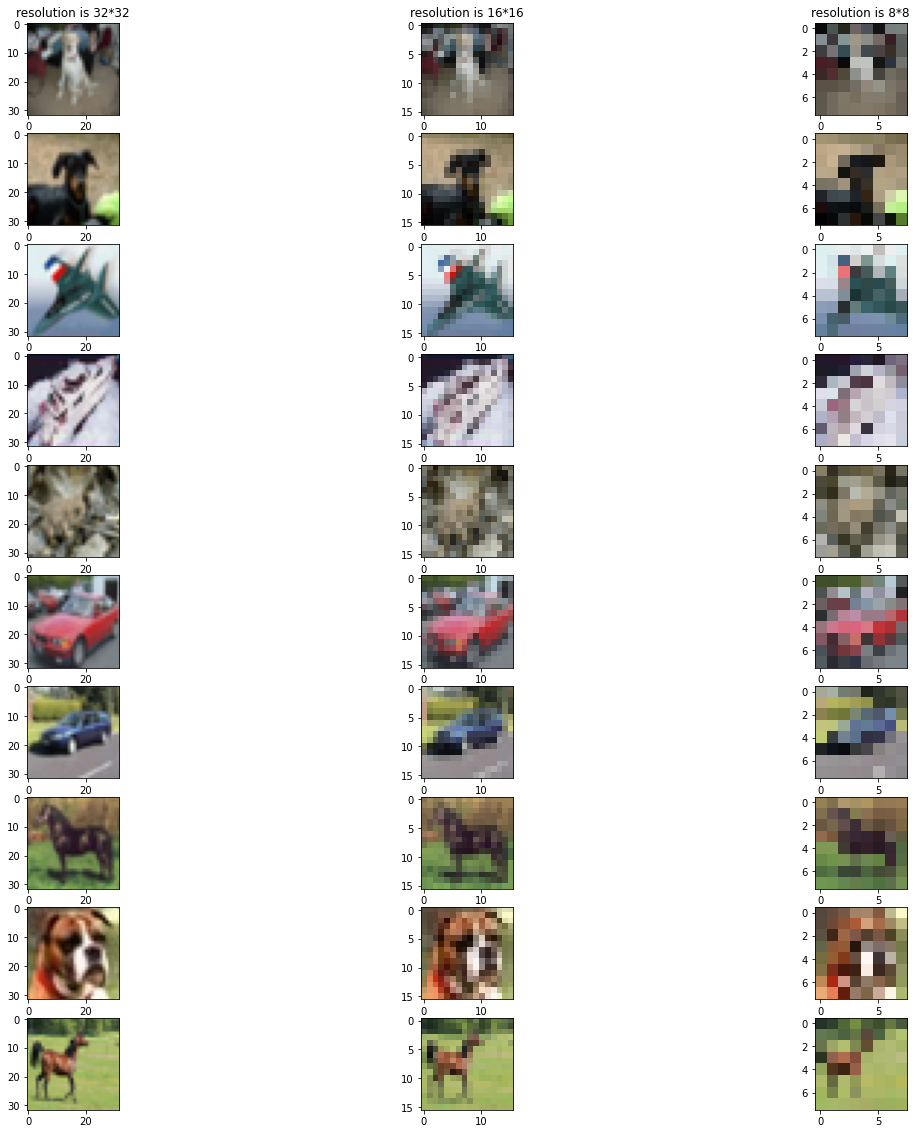

In [33]:
pic_show(10)

**TVTV MODELs **

In [34]:
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [36]:
#define model

def tvtv_model(shape):
  model = Sequential()
  
  #as explained in question we first have 3 conv2d
  model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=shape))
  model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  
  #pooling
  model.add(MaxPooling2D((2, 2)))
  
  #dropout
  model.add(Dropout(0.25))
  #agin we have som conv
  model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  
  #pooling
  model.add(MaxPooling2D((2, 2)))
  
  #dropout
  model.add(Dropout(0.25))
  
  #dense 
  model.add(Flatten())
  model.add(Dense(512, activation='relu', kernel_initializer='he_uniform'))
  #we also have another dropout here
  model.add(Dropout(0.5))
  model.add(Dense(10, activation='softmax'))
  # compile model

  opt = SGD(lr=0.01, momentum=0.9)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy',f1_m,precision_m])
  return model


In [37]:
#TVTV Models

#first on original images
#TVTV ON 32*32
model_32=tvtv_model((32,32,3))
history_32 = model_32.fit(x_train, y_train, epochs=50, batch_size=128, validation_data=(x_test, y_test), verbose=1)
_, acc_32,F1_32,Precison_32 = model_32.evaluate(x_test,y_test, verbose=1)
print('accuracy of 32*32 image is ' +str(acc_32 * 100.0))
print('f1 score of 32*32 image is ' +str(F1_32 * 100.0))
print('Precison of 32*32 image is ' +str(Precison_32 * 100.0))
# model.summary()

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/50
391/391 [==============================] - 18s 22ms/step - loss: 1.9282 - accuracy: 0.2870 - f1_m: 0.0931 - precision_m: 0.4157 - val_loss: 1.5062 - val_accuracy: 0.4613 - val_f1_m: 0.2745 - val_precision_m: 0.7030
Epoch 2/50
391/391 [==============================] - 7s 18ms/step - loss: 1.4533 - accuracy: 0.4707 - f1_m: 0.3631 - precision_m: 0.6732 - val_loss: 1.2429 - val_accuracy: 0.5622 - val_f1_m: 0.4533 - val_precision_m: 0.7764
Epoch 3/50
391/391 [==============================] - 7s 18ms/step - loss: 1.2255 - accuracy: 0.5592 - f1_m: 0.5029 - precision_m: 0.7293 - val_loss: 1.0589 - val_accuracy: 0.6178 - val_f1_m: 0.5817 - val_precision_m: 0.7600
Epoch 4/50
391/391 [==============================] - 7s 18ms/step - loss: 1.0733 - accuracy: 0.6172 - f1_m: 0.5802 - precision_m: 0.7578 - val_loss: 0.9614 - val_accuracy: 0.6595 - val_f1_m: 0.6194 - val_precision_m: 0.8009
Epoch 5/50
391/391 [==============================] - 7s 18ms/step - loss: 0.9789 - accuracy: 0.651

In [38]:
#TVTV MODEL ON 16*16
model_16=tvtv_model((16,16,3))
history_16 = model_16.fit(x_train_16, y_train, epochs=50, batch_size=128, validation_data=(x_test_16, y_test), verbose=1)
_, acc_16,F1_16,Precison_16 = model_16.evaluate(x_test_16,y_test, verbose=1)
print('accuracy of 16*16 image is ' +str(acc_16 * 100.0))
print('f1 score of 16*16 image is ' +str(F1_16 * 100.0))
print('Precison of 16*16 image is ' +str(Precison_16 * 100.0))

Epoch 1/50
391/391 [==============================] - 4s 8ms/step - loss: 2.0748 - accuracy: 0.2244 - f1_m: 0.0336 - precision_m: 0.3612 - val_loss: 1.7681 - val_accuracy: 0.3456 - val_f1_m: 0.0334 - val_precision_m: 0.6722
Epoch 2/50
391/391 [==============================] - 3s 7ms/step - loss: 1.6717 - accuracy: 0.3752 - f1_m: 0.1831 - precision_m: 0.5911 - val_loss: 1.4894 - val_accuracy: 0.4501 - val_f1_m: 0.2453 - val_precision_m: 0.6909
Epoch 3/50
391/391 [==============================] - 3s 7ms/step - loss: 1.5087 - accuracy: 0.4447 - f1_m: 0.3080 - precision_m: 0.6477 - val_loss: 1.3390 - val_accuracy: 0.5140 - val_f1_m: 0.3940 - val_precision_m: 0.7286
Epoch 4/50
391/391 [==============================] - 3s 7ms/step - loss: 1.4175 - accuracy: 0.4807 - f1_m: 0.3770 - precision_m: 0.6715 - val_loss: 1.2955 - val_accuracy: 0.5291 - val_f1_m: 0.4399 - val_precision_m: 0.7178
Epoch 5/50
391/391 [==============================] - 3s 7ms/step - loss: 1.3267 - accuracy: 0.5177 - f1

In [39]:
#TVTV ON 8*8
model_8=tvtv_model((8,8,3))
history_8 = model_8.fit(x_train_8, y_train, epochs=50, batch_size=128, validation_data=(x_test_8, y_test), verbose=1)
_, acc_8,F1_8,Precison_8 = model_8.evaluate(x_test_8,y_test, verbose=1)
print('accuracy of 8*8 image is ' +str(acc_8 * 100.0))
print('f1 score of 8*8 image is ' +str(F1_8 * 100.0))
print('Precison of 8*8 image is ' +str(Precison_8 * 100.0))

Epoch 1/50
391/391 [==============================] - 4s 7ms/step - loss: 2.1581 - accuracy: 0.1864 - f1_m: 0.0098 - precision_m: 0.1773 - val_loss: 1.9221 - val_accuracy: 0.2984 - val_f1_m: 0.0059 - val_precision_m: 0.3376
Epoch 2/50
391/391 [==============================] - 2s 6ms/step - loss: 1.8314 - accuracy: 0.3197 - f1_m: 0.1008 - precision_m: 0.5493 - val_loss: 1.6596 - val_accuracy: 0.3948 - val_f1_m: 0.2145 - val_precision_m: 0.6441
Epoch 3/50
391/391 [==============================] - 2s 6ms/step - loss: 1.6904 - accuracy: 0.3786 - f1_m: 0.1967 - precision_m: 0.6027 - val_loss: 1.5901 - val_accuracy: 0.4161 - val_f1_m: 0.2593 - val_precision_m: 0.6864
Epoch 4/50
391/391 [==============================] - 2s 6ms/step - loss: 1.6143 - accuracy: 0.4086 - f1_m: 0.2568 - precision_m: 0.6334 - val_loss: 1.5285 - val_accuracy: 0.4461 - val_f1_m: 0.2982 - val_precision_m: 0.7002
Epoch 5/50
391/391 [==============================] - 2s 6ms/step - loss: 1.5632 - accuracy: 0.4321 - f1

TOTV Method

In [40]:
# rescale datas back to 32*32
x_test_16_new=tf.image.resize(x_test_16,(32,32))
history_test16 = model_32.fit(x_train, y_train, epochs=50, batch_size=128, validation_data=(x_test_16_new, y_test), verbose=1)
_, acc_16_TOTV,F1_16_TOTV,Precison_16_TOTV = model_32.evaluate(x_test_16_new,y_test, verbose=1)
print('TOTV Method for 16*16 has:'+'\n'+'acuracy:'+str(acc_16_TOTV * 100.0)+'\n'+'Precision:'+str(Precison_16_TOTV * 100.0)+'\n'+'F1 score:' + str(F1_16_TOTV*100.0))

Epoch 1/50
391/391 [==============================] - 7s 18ms/step - loss: 0.1965 - accuracy: 0.9310 - f1_m: 0.9315 - precision_m: 0.9411 - val_loss: 2.7395 - val_accuracy: 0.4011 - val_f1_m: 0.3968 - val_precision_m: 0.4318
Epoch 2/50
391/391 [==============================] - 7s 18ms/step - loss: 0.1980 - accuracy: 0.9293 - f1_m: 0.9296 - precision_m: 0.9382 - val_loss: 3.0093 - val_accuracy: 0.3732 - val_f1_m: 0.3682 - val_precision_m: 0.3982
Epoch 3/50
391/391 [==============================] - 7s 18ms/step - loss: 0.1829 - accuracy: 0.9358 - f1_m: 0.9365 - precision_m: 0.9453 - val_loss: 2.8426 - val_accuracy: 0.4134 - val_f1_m: 0.4134 - val_precision_m: 0.4416
Epoch 4/50
391/391 [==============================] - 7s 18ms/step - loss: 0.1835 - accuracy: 0.9367 - f1_m: 0.9372 - precision_m: 0.9455 - val_loss: 2.6037 - val_accuracy: 0.4507 - val_f1_m: 0.4530 - val_precision_m: 0.4855
Epoch 5/50
391/391 [==============================] - 7s 19ms/step - loss: 0.1839 - accuracy: 0.9351

In [41]:
#  rescale datas back to 32*32
x_test_8_new=tf.image.resize(x_test_8,(32,32))
history_test_8 = model_32.fit(x_train, y_train, epochs=50, batch_size=128, validation_data=(x_test_8_new, y_test), verbose=1)
_, acc_8_TOTV,F1_8_TOTV,Precison_8_TOTV = model_32.evaluate(x_test_8_new,y_test, verbose=1)
print('TOTV Method for 8*8 has:'+'\n'+'acuracy:'+str(acc_8_TOTV * 100.0)+'\n'+'Precision:'+str(Precison_8_TOTV * 100.0)+'\n'+'F1 score:' + str(F1_8_TOTV*100.0))

Epoch 1/50
391/391 [==============================] - 7s 19ms/step - loss: 0.1110 - accuracy: 0.9607 - f1_m: 0.9614 - precision_m: 0.9648 - val_loss: 5.0097 - val_accuracy: 0.2467 - val_f1_m: 0.2442 - val_precision_m: 0.2642
Epoch 2/50
391/391 [==============================] - 7s 18ms/step - loss: 0.1109 - accuracy: 0.9622 - f1_m: 0.9623 - precision_m: 0.9657 - val_loss: 5.2679 - val_accuracy: 0.2412 - val_f1_m: 0.2399 - val_precision_m: 0.2542
Epoch 3/50
391/391 [==============================] - 7s 19ms/step - loss: 0.1112 - accuracy: 0.9618 - f1_m: 0.9621 - precision_m: 0.9657 - val_loss: 5.0404 - val_accuracy: 0.2469 - val_f1_m: 0.2432 - val_precision_m: 0.2622
Epoch 4/50
391/391 [==============================] - 7s 19ms/step - loss: 0.1082 - accuracy: 0.9634 - f1_m: 0.9636 - precision_m: 0.9671 - val_loss: 5.1234 - val_accuracy: 0.2546 - val_f1_m: 0.2527 - val_precision_m: 0.2692
Epoch 5/50
391/391 [==============================] - 7s 19ms/step - loss: 0.1109 - accuracy: 0.9621